<a href="https://colab.research.google.com/github/jacksparrow121/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

Before proceeding further analysis, we should import required libraries:-

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np

In [ ]:
#we are importing the seaborn
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here i am importing the file path, to make accessable

In [ ]:
#importing the file for accessing it
file_path = pd.read_csv('/content/drive/MyDrive/alma better/1st EDA/Copy of Hotel Bookings.csv')
df=file_path


### Exploring the dataframe :

In [ ]:
#exploring the top entities of the data set
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#exploring the last five entities of the data frame:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#checking the total data shape to know the total number of rows and columns
df.shape

(119390, 32)

In [ ]:
#exploring the totals columns;
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
#finding the basic description of the data frame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Important observation from the description,that we can analyze the different mathematical parametre by description method whci is applied on the data frame

Arrival Day in a month: Max-31 and Min:-1 and mean:15.798

Arrival Date year: MAX: 2015 and MIN:2017 and mean:2016.156

Lead time: Max: 737 and MIN: 0.00 and mean:104.011




In [ ]:
#Getting the basic description of the dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
#transposing the dataframe of description to get view over there:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
#finding the unique value of the dataframe,it will unique value for the respective columns:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [ ]:
#Finding the unique kind of Hotels:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Here we have got the two types of hotel

In [ ]:
#considering it in the form of list
list(df['hotel'].unique())

['Resort Hotel', 'City Hotel']

In [ ]:
#here we are interested in finding the best time of the year to book the hotels
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

just above we have find the total months which are active for the entire year.
Now I am interested in finding the number of months for the hotel mto be active.

In [ ]:
df['arrival_date_month'].nunique()

12

## 1.BEST TIME OF YEAR TO BOOK THE HOTEL

So, we have concluded that hotel is active in the entire years.
Now we are interested in calculating in which month,hotel is usually have more coustmers.

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


As per the defination of lead time,when lead time will be max for the particular month will be the best time to book the hotel in year.

In [ ]:
new_df=df.groupby('arrival_date_month')['lead_time'].count()
new_df

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: lead_time, dtype: int64

Here, we have to calculate the max lead time for the particular month,we will be applying the describe method once more:

In [ ]:
new_df.describe()

count       12.000000
mean      9949.166667
std       2521.813303
min       5929.000000
25%       7749.500000
50%      10723.500000
75%      11317.750000
max      13877.000000
Name: lead_time, dtype: float64

So, as far we have caculated maximum lead time, i.e. best time to book the hotels is month of "August".

More analysis for the best time with the help of bar graph:
But before that we have to import the required ploting library required for plotting.

In [ ]:
#importing the matplotlib
import matplotlib.pyplot as plt


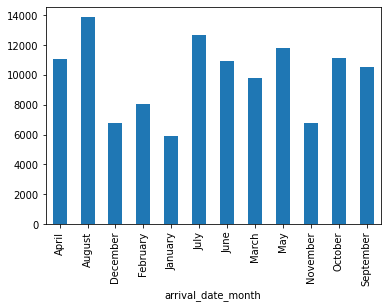

In [ ]:
#Visualizing it with the help of graph
new_df.plot.bar()

As we can see in the bargraph month of August have more height in camparision with other,so we can conclude the best time for book hotel is month of August.

## 2.OPTIMAL LENGTH TO STAY IN ORDER TO GET THE BEST DAILY RATE:

In [ ]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#exploring the total customer types
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

Now,I am interested in type of customer have corresponding booking

In [ ]:
df1=df.groupby('customer_type')['stays_in_weekend_nights','stays_in_week_nights'].count()
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,stays_in_weekend_nights,stays_in_week_nights
customer_type,,
Contract,4076,4076
Group,577,577
Transient,89613,89613
Transient-Party,25124,25124


In [ ]:
import numpy as np

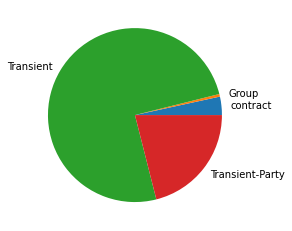

In [ ]:
#for make it visualization clear,we can do it with the help of pie-chart
y=np.array(df1['stays_in_weekend_nights'])
mylabels=['contract','Group','Transient','Transient-Party']
plt.pie(y, labels = mylabels)
plt.show()

From here, we can conclude that transient type of customer used to stay in hotel more in camparision with others three types.

But we are interested in best daily rates....

## 2.OPTIMAL LENGTH TO STAY IN ORDER TO GET THE BEST DAILY RATE:

In [ ]:
#for best daily rate,we have to figure out the,day in a month where customers are more dense in betwwen the dates.
df2=df.groupby('arrival_date_day_of_month')['stays_in_week_nights'].count()
df2

arrival_date_day_of_month
1     3626
2     4055
3     3855
4     3763
5     4317
6     3833
7     3665
8     3921
9     4096
10    3575
11    3599
12    4087
13    3745
14    3819
15    4196
16    4078
17    4406
18    4002
19    4052
20    4032
21    3767
22    3596
23    3616
24    3993
25    4160
26    4147
27    3802
28    3946
29    3580
30    3853
31    2208
Name: stays_in_week_nights, dtype: int64

In [ ]:
#if we find out the maximum density in the month days,then we will be able to figure out best daily rate
df2.describe()

count      31.000000
mean     3851.290323
std       379.212534
min      2208.000000
25%      3705.000000
50%      3855.000000
75%      4066.500000
max      4406.000000
Name: stays_in_week_nights, dtype: float64

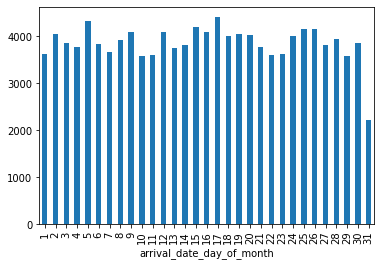

In [ ]:
df2.plot.bar()

Here we can clearly see that,17th day of the month customer used to stay in the hotel more,so from here we can figure out that on every 17th day,it's the best day to have an optimal rates.

## 3.NOW WE ARE MORE INTERESTED IN WHICH TYPE OF HOTEL ARE IN MORE DEMAND:

In [ ]:
#figure out the type of hotel
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

which type of hotel is in more demand will be examined on the number of stay parametre.So let's do the further analysis:


In [ ]:
df3=df.groupby('hotel')['stays_in_week_nights'].count()
df3

hotel
City Hotel      79330
Resort Hotel    40060
Name: stays_in_week_nights, dtype: int64

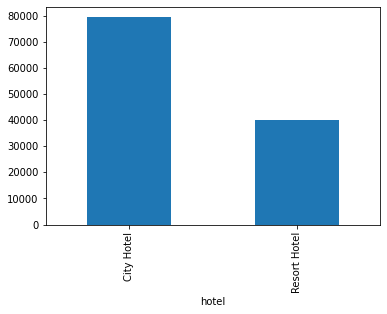

In [ ]:
#observing the more demand hotels
df3.plot.bar()

## Booking acroos years is higher for city hotel comapred to resort hotel and don't increase proportionally across the years.

# And now we are also interested in types of deposit with the graphical representation:

In [ ]:
#deposit type exploration
new_df2=df.groupby('deposit_type')['hotel'].count()
new_df2

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: hotel, dtype: int64

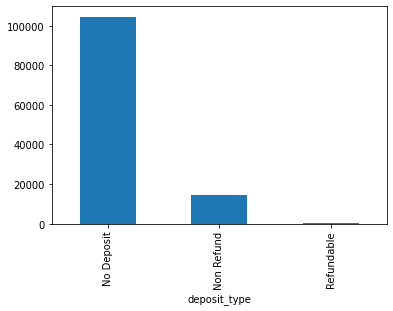

In [ ]:
#So below is the bar graph for the deposit types,that the how many people is happy to choose deposit type,how many Non-refund and how many refund
new_df2.plot.bar()

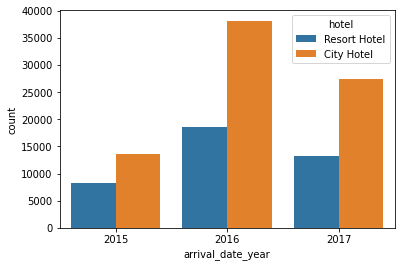

In [ ]:
#we are ploting the graph of hotel vs years proportion:
sns.countplot(x='arrival_date_year',data=df,hue='hotel').set_tittle=('yearly_bookings')


### 4.Exploring the no. of adults,children and babies stay in hotel?

In [ ]:
#calculating no. of adults,babies,children by creation of the dataframe
a_df=df['adults'].sum()
b_df=df['babies'].sum()
c_df=df['children'].sum()
n_df=pd.DataFrame([{'adults':a_df,'babies':b_df,'children':c_df}])
n_df

,adults,babies,children
0,221636,949,12403.0


Here I am intrested in drawing piechart for this:
to make it proper visualize

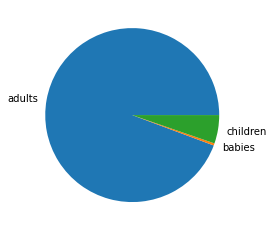

In [ ]:
#Here we have visulaize no. of adults,children and babies with the help of piechart
y=np.array([221636,949,12403])
mylabels=['adults','babies','children']
plt.pie(y, labels = mylabels)
plt.show()

## 5.How many different countries are present in the data:

In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
#what is the total no. of countries present in the dataframe:
df['country'].nunique()

177

In [ ]:
#we are interested in the frequency of the country
cy=df.groupby('country')['stays_in_week_nights'].count()
cy.max()

48590

So here maximum frequency for the particular country is 48590.Which is really huge.

In [ ]:
#to analyze the others parametre also,now once we should have dtaframe:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


## 6.Now we are interested in droping the irelevant column from the dataframe:

In [ ]:
#droping column from the dataframe
#df.drop(['company','previous_cancellations','previous_bookings_not_canceled'],axis=1,inplace=True)
df.shape

(119390, 32)

above we have drop the irelevant column from our dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 7.Here we are analyzing the dataframe for higher stay according to the lead time for best time to book the hotel with the help of line graph.

but before that we have to import the line graph tool with the help of seaborn.

In [ ]:
#we are importing the seaborn
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
#here we are creating the dtaframe for our required plotting
new_df=df.groupby('arrival_date_month')['lead_time'].count()
new_df

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: lead_time, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


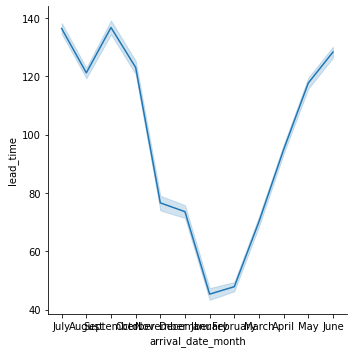

In [ ]:
#we are analysing the best time toi book the hotel with the help of line plot as we can see it below with respect to lead time
sns.relplot('arrival_date_month','lead_time',data=df,kind='line')

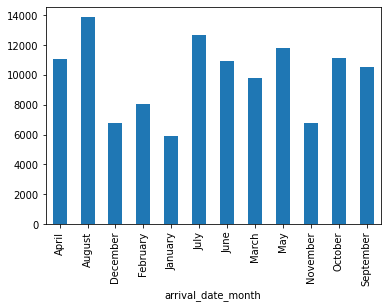

In [ ]:
#We can clearly see the difference between this two types of plot
new_df.plot.bar()

As we can see over here,august have more spike,so we can conclude with this also that august is the best time to book the hotel,and now we are interested in meal given by the hotels .

## 8.Here we are doing the analysis of the meal assign by the hotel

In [ ]:
#evaluating the number and types of meals
list(df['meal'].unique())


['BB', 'FB', 'HB', 'SC', 'Undefined']

In [ ]:
df['meal'].nunique()

5

In [ ]:
#we are doing analysis on the basis  for type of meal
meal_df=df.groupby('meal').count()
meal_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
meal,,,,,,,,,,,,,,,,,,,,,
BB,92310,92310,92310,92310,92310,92310,92310,92310,92310,92310,...,92310,77781,6550,92310,92310,92310,92310,92310,92310,92310
FB,798,798,798,798,798,798,798,798,798,798,...,798,671,17,798,798,798,798,798,798,798
HB,14463,14463,14463,14463,14463,14463,14463,14463,14463,14463,...,14463,13433,114,14463,14463,14463,14463,14463,14463,14463
SC,10650,10650,10650,10650,10650,10650,10650,10650,10650,10650,...,10650,10334,59,10650,10650,10650,10650,10650,10650,10650
Undefined,1169,1169,1169,1169,1169,1169,1169,1169,1169,1169,...,1169,831,57,1169,1169,1169,1169,1169,1169,1169


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


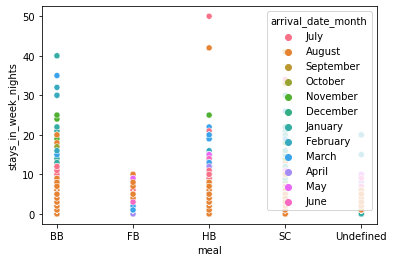

In [ ]:
sns.scatterplot(df['meal'],df['stays_in_week_nights'],df['arrival_date_month'])

In above,I have concluded that which type of meal preffered more and preffered when.

### 9.At last we are interested in correlation of the required column to nullify all the null values so our dataframe can get more structured.

but before that we have to understand the meaning of correlation,"it simply means how a value is varrying with respect to any variation in the another value of another column."

In [ ]:
#here we are extracting some correlation between the data points
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


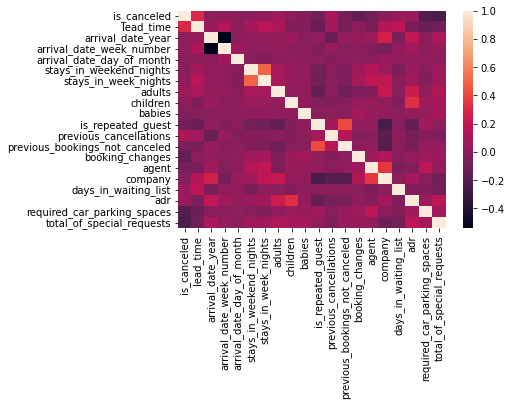

In [ ]:
#we can plot this things into the form of heatmap,how correlation is exactly happening can be analyzed with the help of heatmap
sns.heatmap(df.corr())

# As a matter of fact,why we are interested in calculating the the correlation,when we study further for more in tabular structure,the correlation seems to be very important parametre because it provides us the variation relation between the two columns.

### 11.CONCLUSION

Here I have done my first EDA(exploratory data analysis) project on hotel booking analysis.Where I have involve so many step such as 'Data cleaning' by droping the irrelevant column and filtering the data as per the requirement,'Data manipulation' and 'data visualization with the help of certain clause such as 'groupby'.Below are the conclusion point drawn with the help of data analysis for this dataset.

1.Best time to book the hotel is month of August,because according to the lead time, demand is very high in month of August.

2.The total customer type in the dataset are of four types,which are contract,Group,Transient,Transient-Party.

3.17th day of the month,customer used to stay in the hotel more to get the daily optimal rates.

4.Booking acroos years is higher for city hotel comapred to resort hotel and don't increase proportionally across the years.

5.Adult's number are more,then followed by children and then babies.

6.With the help of correlation matrix, we can see that the how columns are varrying with respect to each other.